In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import calmap

In [2]:
df=pd.read_csv("SP500_close_price_no_missing.csv")

In [3]:
df.head()

,date,MMM,ACE,ABT,ANF,ADBE,AMD,AES,AET,AFL,...,WYN,WYNN,XEL,XRX,XLNX,XL,YHOO,YUM,ZMH,ZION
0,2011-01-03,86.79,62.24,47.82,58.03,31.29,8.47,12.54,31.04,57.54,...,30.67,108.99,23.56,11.71,29.42,22.16,16.75,49.09,54.97,25.17
1,2011-01-04,86.67,62.20,48.27,56.22,31.51,8.77,12.60,31.20,56.49,...,30.48,112.39,23.66,11.40,29.54,22.05,16.59,48.34,54.24,24.76
2,2011-01-05,86.67,61.99,48.27,55.35,32.22,8.91,12.77,31.50,56.38,...,30.38,113.84,23.52,11.46,29.64,22.17,16.91,48.57,54.28,24.90
3,2011-01-06,86.14,61.72,48.17,53.53,32.27,8.69,12.99,32.09,56.07,...,29.94,114.67,23.50,11.46,30.14,22.16,17.06,48.91,52.60,24.83
4,2011-01-07,86.23,61.26,48.37,53.57,32.04,8.83,12.99,32.16,55.85,...,29.83,118.73,23.71,11.30,29.97,22.12,16.90,49.52,52.59,24.57


In [4]:
df.shape

(1043, 472)

In [5]:
df1=pd.read_csv("SP500_ticker.csv")

In [6]:
df1.head()

,ticker,company_name,sector
0,MMM,3M Co.,Industrials
1,ACE,ACE Limited,Financials
2,ABT,Abbott Laboratories,Health Care
3,ANF,Abercrombie & Fitch Company A,Consumer Discretionary
4,ADBE,Adobe Systems Inc,Information Technology


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ticker        500 non-null    object
 1   company_name  500 non-null    object
 2   sector        500 non-null    object
dtypes: object(3)
memory usage: 11.8+ KB


#### Derive log returns from the raw stock price dataset

In [8]:
log_returns = np.log(df.set_index('date') / df.set_index('date').shift(1))

In [9]:
log_returns.head(2)

,MMM,ACE,ABT,ANF,ADBE,AMD,AES,AET,AFL,A,...,WYN,WYNN,XEL,XRX,XLNX,XL,YHOO,YUM,ZMH,ZION
date,,,,,,,,,,,,,,,,,,,,,
2011-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-04,-0.001384,-0.000643,0.009366,-0.031688,0.007006,0.034806,0.004773,0.005141,-0.018417,-0.009356,...,-0.006214,0.030719,0.004235,-0.02683,0.004071,-0.004976,-0.009598,-0.015396,-0.013369,-0.016423


#### Plot a scree plot which shows the distribution of variance contained in subsequent principal components sorted by their eigenvalues.

In [10]:
pca = PCA(n_components=20)
pca.fit(log_returns.dropna())

PCA(n_components=20)

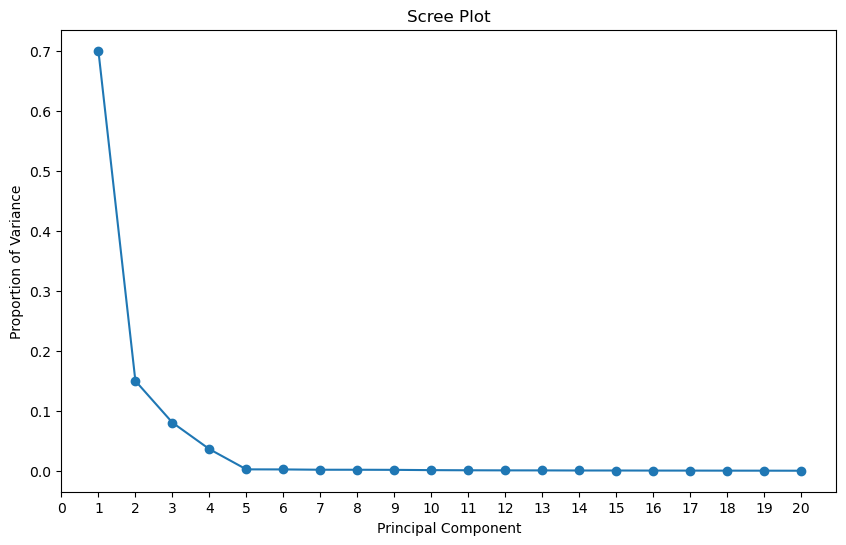

In [11]:
eigenvalues = pca.explained_variance_
eigenvectors = pca.components_

sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[sorted_indices, :]

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues / np.sum(eigenvalues), marker='o')
plt.title('Scree Plot')
plt.xticks([i for i in range(21)])
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance')
plt.show()

#### Create a second plot showing cumulative variance retained if top N components are kept after dimensionality reduction

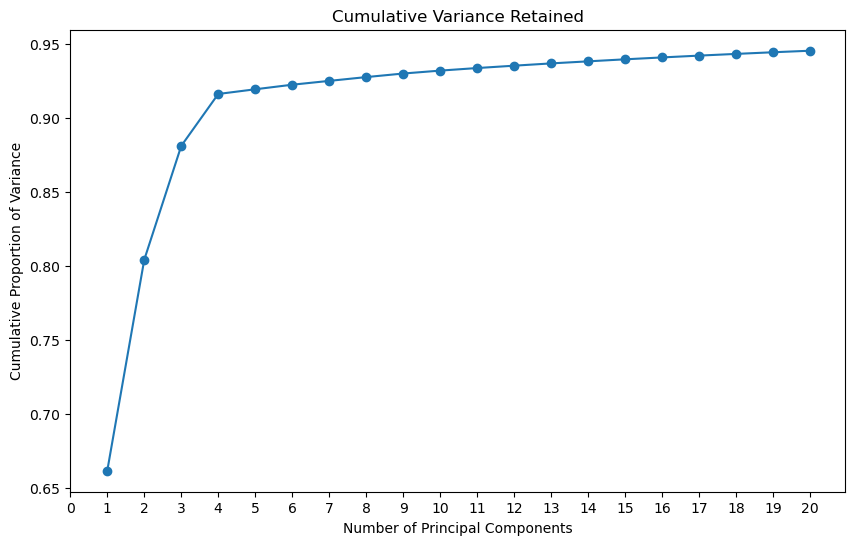

In [12]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Cumulative Variance Retained')
plt.xticks([i for i in range(21)])
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Proportion of Variance')
plt.show()

#### How many principal components must be retained in order to capture at least 80% of the total variance in data?

In [13]:
n_components_80 = np.argmax(cumulative_variance >= 0.8) + 1
print(f"Number of components to capture at least 80% of variance: {n_components_80}")

Number of components to capture at least 80% of variance: 2


#### Compute and plot the time series of the 1st principal component and observe temporal patterns. Identify the date with the lowest value for this component and conduct a quick research on the Internet to see if you can identify event(s) that might explain the observed behavior. 

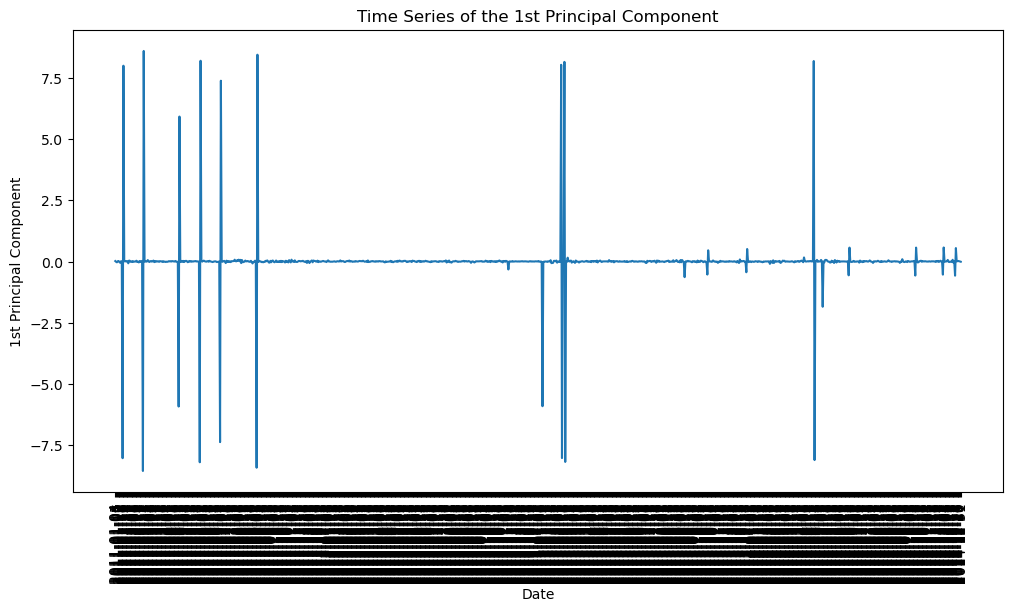

In [14]:
first_principal_component = pca.transform(log_returns.dropna())[:, 0]

plt.figure(figsize=(12, 6))
plt.plot(df['date'][1:], first_principal_component)  # Exclude the first date due to NaN values
plt.title('Time Series of the 1st Principal Component')
plt.xlabel('Date')
plt.ylabel('1st Principal Component')
plt.xticks(rotation=90)
plt.show()

> Above plot is not so clear hence designing a new plot

In [15]:
result_df = pd.concat([df['date'], pd.Series(first_principal_component)], axis=1)
result_df['date'] = pd.to_datetime(df['date'])
result_df.set_index('date', inplace=True)

In [16]:
result_df.columns = ['pca']
result_df.head()

,pca
date,
2011-01-03,0.023919
2011-01-04,-0.006535
2011-01-05,-0.026924
2011-01-06,0.017775
2011-01-07,0.026269


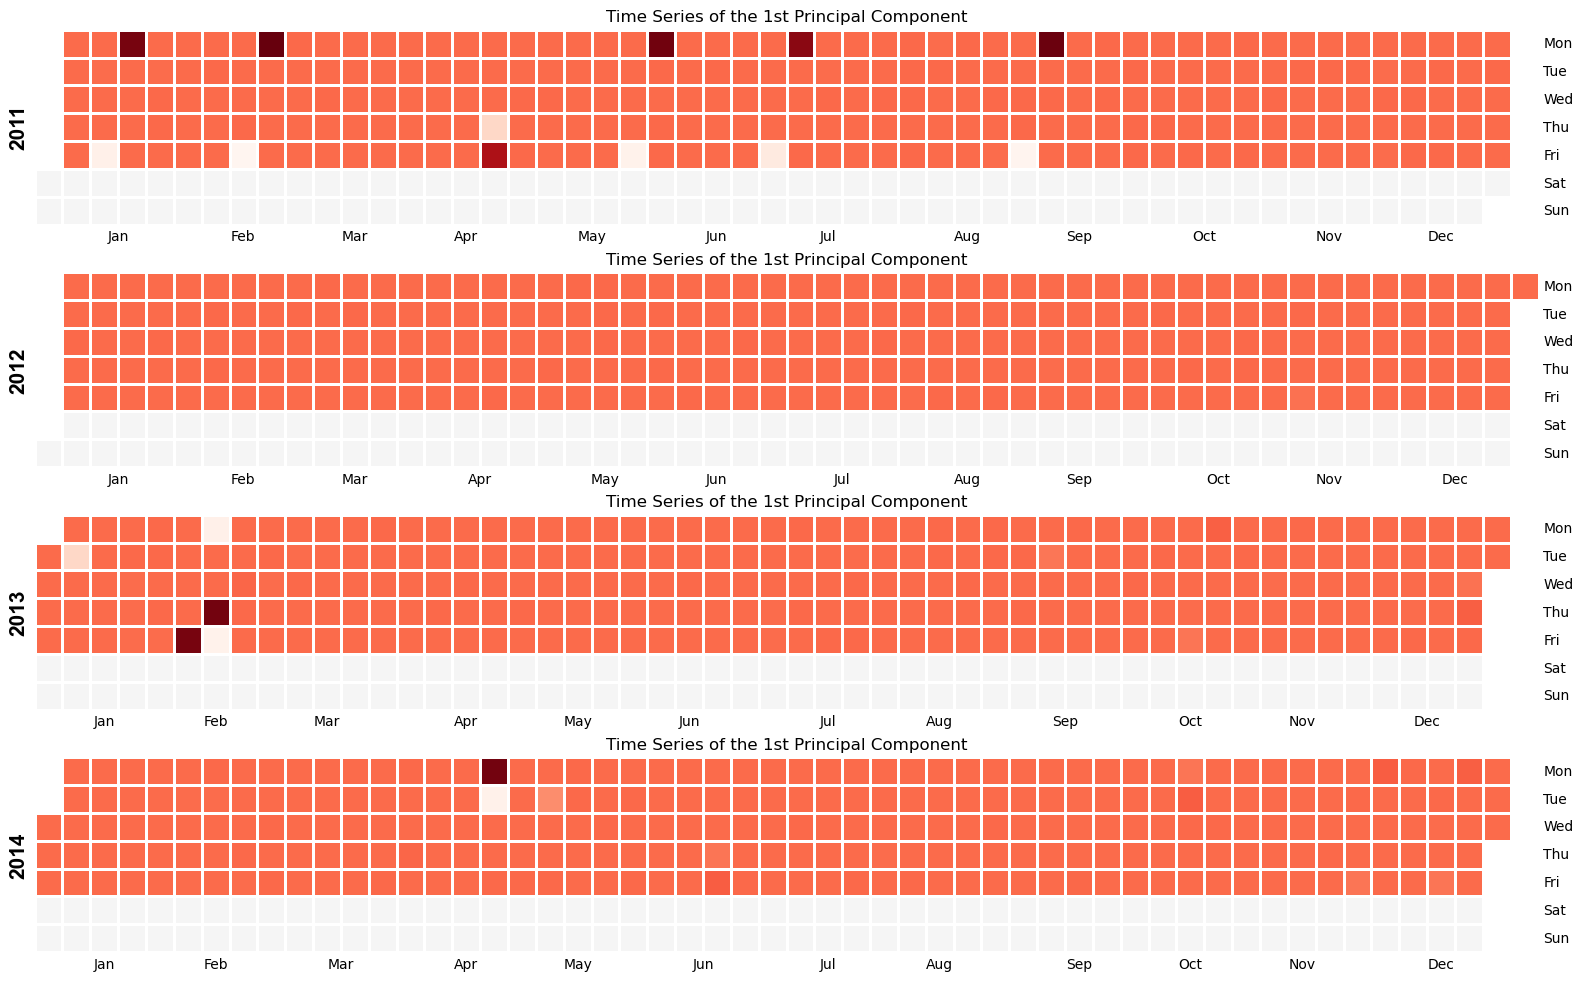

In [17]:
calmap.calendarplot(result_df, fig_kws={'figsize': (16,10)}, yearlabel_kws={'color':'black', 'fontsize':15}, subplot_kws={'title':'Time Series of the 1st Principal Component'})
plt.show()

In [18]:
lowest_value_date = df['date'][1:][np.argmin(first_principal_component)]
print(f"Date with the lowest value for the 1st principal component: {lowest_value_date}")

Date with the lowest value for the 1st principal component: 2011-02-18


In [19]:
result_df = result_df.sort_values(by='pca')
result_df.head()

,pca
date,
2011-02-18,-8.548890
2011-09-02,-8.416019
2011-05-27,-8.193062
2013-02-15,-8.179308
2014-04-22,-8.102345


> From May 2011 to October 2011 there was a decrease by 21% in S&P 500 stocks which led to 2.5 Trillion USD wiping out in USA market

https://en.wikipedia.org/wiki/August_2011_stock_markets_fall

#### Extract the weights from the PCA model for 1st and 2nd principal components. 

In [20]:
weights_1st_pc = pca.components_[0, :]
weights_2nd_pc = pca.components_[1, :]

#### Create a plot to show weights of the 1st principal component grouped by the industry sector

In [21]:
mean_weight = np.mean(weights_1st_pc)
new_weights = np.full(29, mean_weight)
weights_1st_pc = np.concatenate((weights_1st_pc, new_weights))

In [22]:
df1['sector'] = df1['sector'].apply(lambda x: x.strip())

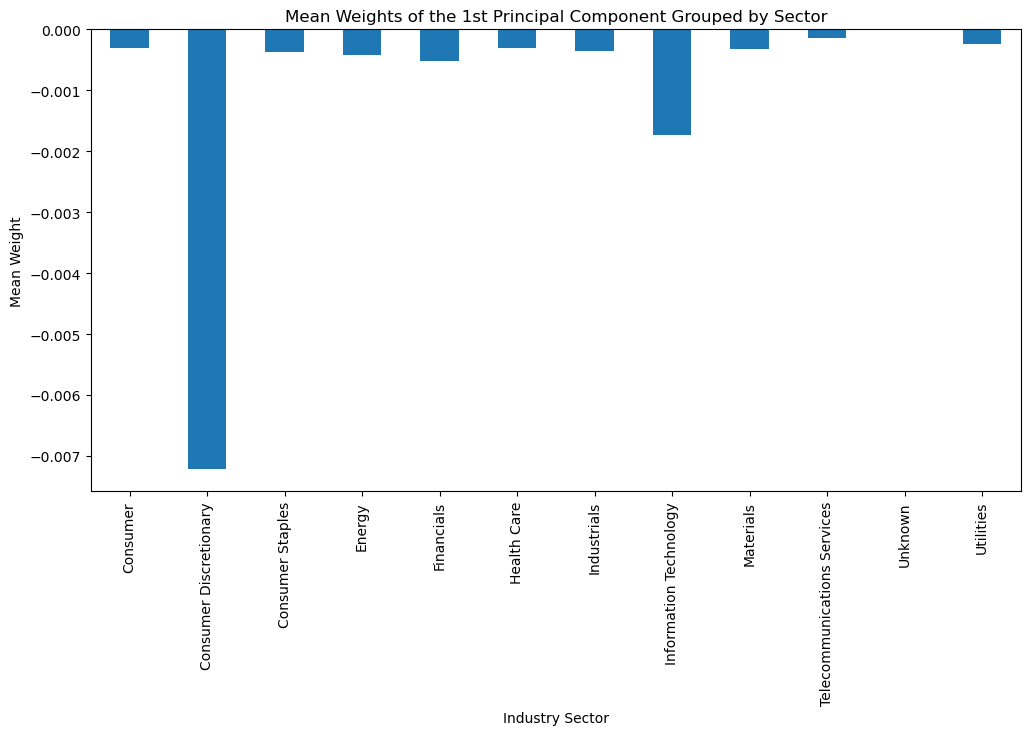

In [23]:
mean_weights_by_sector_1st_pc = df1.groupby('sector')['ticker'].apply(lambda x: np.mean([weights_1st_pc[np.where(df1['ticker'] == ticker)[0][0]] for ticker in x]))
#For each sector, above lambda function calculates the mean weight of the 1st principal component
plt.figure(figsize=(12, 6))
mean_weights_by_sector_1st_pc.plot(kind='bar')
plt.title('Mean Weights of the 1st Principal Component Grouped by Sector')
plt.xlabel('Industry Sector')
plt.ylabel('Mean Weight')
plt.show()

> We can say that the stocks in most sectors are moving in a downward direction, indicating a decline in their overall value. And Investors must not invest in Consumer Discretionary sector(includes Tourism, Clothing, Fashin and Jewellery , other similar sector) since it may bring losses.

#### Create a plot to show weights of the 2nd principal component grouped by the industry sector

In [24]:
mean_weight_2 = np.mean(weights_2nd_pc)
new_weights = np.full(29, mean_weight_2)
weights_2nd_pc = np.concatenate((weights_2nd_pc, new_weights))

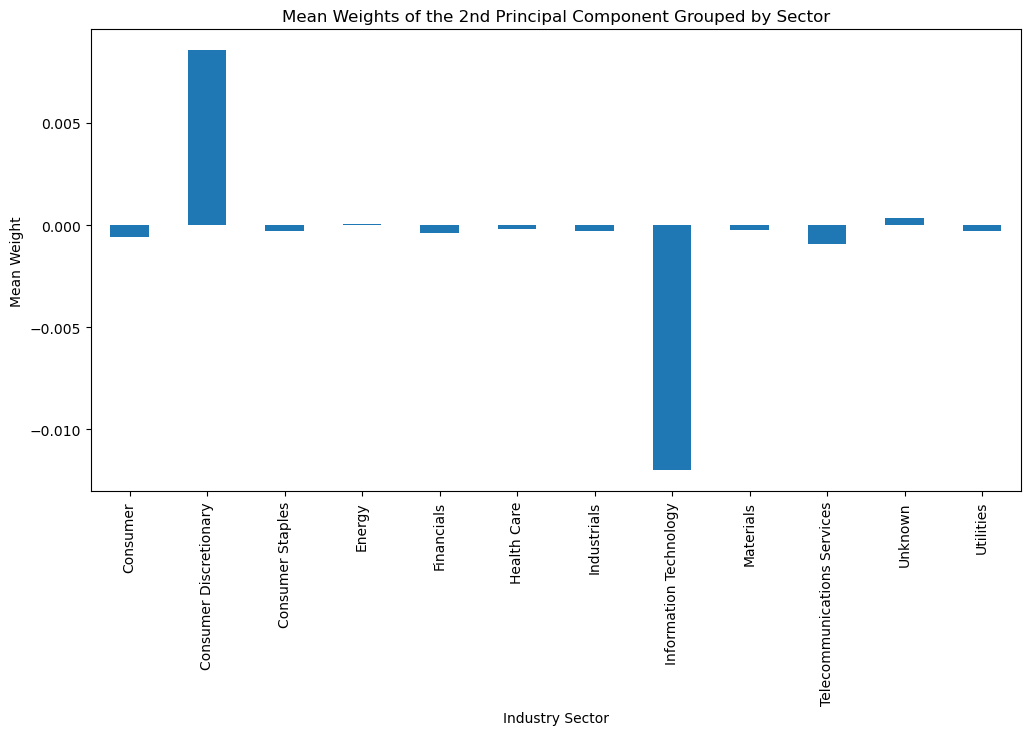

In [25]:
mean_weights_by_sector_2nd_pc = df1.groupby('sector')['ticker'].apply(lambda x: np.mean([weights_2nd_pc[np.where(df1['ticker'] == ticker)[0][0]] for ticker in x]))
#For each sector, above lambda function calculates the mean weight of the 1st principal component
plt.figure(figsize=(12, 6))
mean_weights_by_sector_2nd_pc.plot(kind='bar')
plt.title('Mean Weights of the 2nd Principal Component Grouped by Sector')
plt.xlabel('Industry Sector')
plt.ylabel('Mean Weight')
plt.show()

- We can observe Consumer Discretionary sector which has highest negative PC1 has highest postive PC2 and Information technology which has second highest negative PC1 has highest negative PC2

- This indicates that market is highly influenced by factors other than the overall market. But the effect is less on Information Technology since both PC1 and PC2 are negative for this.

#### Suppose we wanted to construct a new stock index using one principal component to track the overall market tendencies. Which of the two components would you prefer to use for this purpose, the 1st or the 2nd? Why?

In [26]:
mean_weights_by_sector_2nd_pc_reset = mean_weights_by_sector_2nd_pc.reset_index()
mean_weights_by_sector_1st_pc_reset = mean_weights_by_sector_1st_pc.reset_index()

merged_df = pd.merge(mean_weights_by_sector_2nd_pc_reset, mean_weights_by_sector_1st_pc_reset, on='sector', suffixes=('PC2 Value', 'PC1 Value'))

merged_df.set_index('sector', inplace=True)
merged_df['tickerPC1 Value'] = merged_df['tickerPC1 Value'].abs()
merged_df['tickerPC2 Value'] = merged_df['tickerPC2 Value'].abs()

merged_df

,tickerPC2 Value,tickerPC1 Value
sector,,
Consumer,0.000571,0.000305
Consumer Discretionary,0.008545,0.007220
Consumer Staples,0.000286,0.000377
Energy,0.000068,0.000415
Financials,0.000391,0.000521
Health Care,0.000193,0.000308
Industrials,0.000287,0.000350
Information Technology,0.012000,0.001737
Materials,0.000239,0.000329


> I would prefer to use the 2nd principal component (PC2) to track the overall market tendencies. This is because,in the above table we can observe that PC2 has the highest overall absolute values(0.000068 to 0.012000) compared to PC1 (0.000017 to 0.007220), which means that it captures the largest amount of variation in the data.

### Problem 2

In [27]:
bmi=pd.read_csv("BMI.csv")

In [28]:
bmi.head()

,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,fatpctg
0,22,160.8,62.4,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,25.3
1,22,170.6,80.5,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,6.1
2,23,153.9,69.3,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,12.3
3,23,157.1,70.4,35.5,92.1,77.1,93.9,56.1,36.1,22.7,30.5,27.2,18.2,9.4
4,23,196.5,88.6,38.0,96.6,85.3,102.5,59.1,37.6,23.2,31.8,29.7,18.3,10.3


#### Wrapper method: Search for the best set of features using backward and forward stepwise regression

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector

X = bmi.drop('fatpctg', axis=1)
y = bmi['fatpctg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
sfs_forward = SequentialFeatureSelector(lr, forward=True, k_features='best', scoring='r2', cv=5)
sfs_forward.fit(X_train, y_train)

sfs_backward = SequentialFeatureSelector(lr, forward=False, k_features='best', scoring='r2', cv=5)
sfs_backward.fit(X_train, y_train)

selected_features_forward = list(X.columns[list(sfs_forward.k_feature_idx_)])
selected_features_backward = list(X.columns[list(sfs_backward.k_feature_idx_)])

print("Forward Stepwise Regression Selected Features:", selected_features_forward)
print("Backward Stepwise Regression Selected Features:", selected_features_backward)


Forward Stepwise Regression Selected Features: ['Age', 'Neck', 'Chest', 'Abdomen', 'Biceps', 'Wrist']
Backward Stepwise Regression Selected Features: ['Age', 'Neck', 'Chest', 'Abdomen', 'Biceps', 'Wrist']


#### Filter method:  output a ranking of features using correlation statistics

In [30]:
correlation_matrix = bmi.corr()
correlation_with_target = correlation_matrix['fatpctg'].abs().sort_values(ascending=False)

print("Feature Ranking based on Correlation:")
print(correlation_with_target[1:])

Feature Ranking based on Correlation:
Abdomen    0.813432
Chest      0.702620
Hip        0.625201
Weight     0.612925
Thigh      0.559608
Knee       0.508665
Biceps     0.493271
Neck       0.490592
Forearm    0.361387
Wrist      0.346575
Age        0.291458
Ankle      0.265970
Height     0.133211
Name: fatpctg, dtype: float64


####  Embedded method: (1) Lasso regression

In [31]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lasso_reg = LassoCV(cv=5)
lasso_reg.fit(X_scaled, y)

selected_features_lasso = X.columns[lasso_reg.coef_ != 0]
print("Lasso Regression Selected Features:", selected_features_lasso)

Lasso Regression Selected Features: Index(['Age', 'Weight', 'Height', 'Neck', 'Abdomen', 'Hip', 'Thigh', 'Biceps',
       'Forearm', 'Wrist'],
      dtype='object')


####  Embedded method: (2) Random Forest

In [32]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print("Random Forest Feature Importance:")
print(feature_importance)

Random Forest Feature Importance:
    Feature  Importance
5   Abdomen    0.731153
2    Height    0.029401
1    Weight    0.029395
12    Wrist    0.026041
8      Knee    0.023688
3      Neck    0.023267
6       Hip    0.022485
0       Age    0.022080
7     Thigh    0.020623
4     Chest    0.020444
9     Ankle    0.019897
10   Biceps    0.017453
11  Forearm    0.014072


In the above feature selection methods 3 distinct methods were used to identify the most relevant predictors for fat percentage prediction.
- The wrapper method, using forward and backward stepwise regression with Linear Regression, consistently selected a subset of features, including Age, Neck, Chest, Abdomen, Biceps, and Wrist. This suggests these features have the strongest predictive relationship with the target variable 'fatpctg'.
- The filter method, based on correlation statistics, revealed that Abdomen, Chest, Hip, Weight, and Thigh exhibited the strongest correlations with fat percentage.So there is some overlap with the stepwise regression selections.
- Lasso Regression selected features such as Age, Weight, Height, Neck, Abdomen, Hip, Thigh, Biceps, Forearm, and Wrist, emphasizing the importance of these variables. 
- Meanwhile, Random Forest highlighted Abdomen as the most crucial predictor, followed by Height, Weight, Wrist, Knee, Neck, Hip, Age, Thigh, Chest, Ankle, Biceps, and Forearm. It assigned some importance to other features not selected by the other methods like 'Knee', 'Ankle' and 'Forearm'. This suggests random forests are able to capture non-linear relationships between features and target.
<br/><br/>
Overall, **'Abdomen'** stands out as an important feature across all the methods. Stepwise regression and lasso regression had fair agreement on predictive features. The random forest brought in additional features highlighting its differences with the linear models.